In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
test=pd.read_csv("/content/test.csv")
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
train=pd.read_csv("/content/train.csv")
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
train=train.dropna()

In [ ]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [ ]:
# Convert specific columns to float
columns_to_convert = ['x','y']  # Add the names of columns you want to convert
test[columns_to_convert] = test[columns_to_convert].astype(int)
train[columns_to_convert] = train[columns_to_convert].astype(int)



In [ ]:
test.head()

,x,y
0,77,79
1,21,23
2,22,25
3,20,17
4,36,41


In [ ]:
test.shape

(300, 2)

In [ ]:
train.shape

(699, 2)

In [ ]:
#combine test & train dataset
df = pd.concat([test,train])
df.head()

,x,y
0,77,79
1,21,23
2,22,25
3,20,17
4,36,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       999 non-null    int64
 1   y       999 non-null    int64
dtypes: int64(2)
memory usage: 23.4 KB


In [ ]:
df.shape

(999, 2)

In [ ]:
x=df['x']
y=df['y']

In [ ]:
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

In [ ]:
x_tensor.shape

torch.Size([999])

In [ ]:
y_tensor.shape

torch.Size([999])

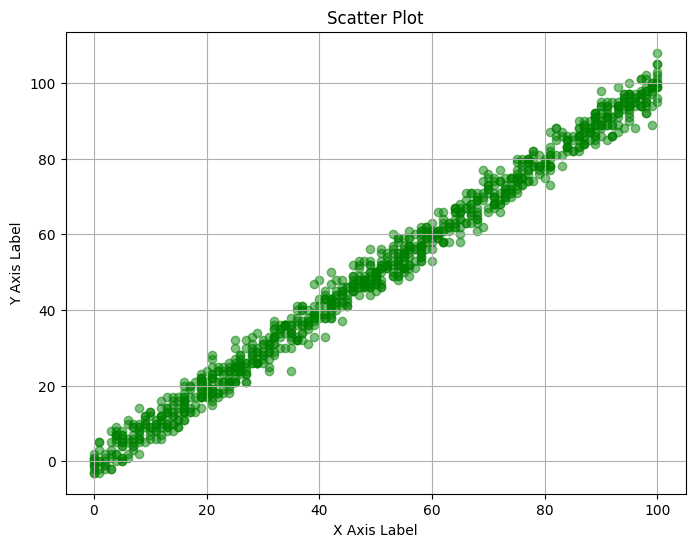

In [ ]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_tensor, y_tensor, color='green', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.grid(True)
plt.show()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    y_pred=self.linear(x)
    return(y_pred)

In [ ]:
model=LinearRegressionModel()
criterion = nn.MSELoss(reduction='sum')
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
print(x_tensor.shape)
print(model.linear.weight.shape)

torch.Size([999, 1])
torch.Size([1, 1])


In [ ]:
x_tensor = x_tensor.reshape(-1, 1)

In [ ]:
for epoch in range(500):
  pred_y=model(x_tensor)
  loss=criterion(pred_y,y_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print('epoch{},loss{}'.format(epoch,loss.item()))

epoch0,lossnan
epoch1,lossnan
epoch2,lossnan
epoch3,lossnan
epoch4,lossnan
epoch5,lossnan
epoch6,lossnan
epoch7,lossnan
epoch8,lossnan
epoch9,lossnan
epoch10,lossnan
epoch11,lossnan
epoch12,lossnan
epoch13,lossnan
epoch14,lossnan
epoch15,lossnan
epoch16,lossnan
epoch17,lossnan
epoch18,lossnan
epoch19,lossnan
epoch20,lossnan
epoch21,lossnan
epoch22,lossnan
epoch23,lossnan
epoch24,lossnan
epoch25,lossnan
epoch26,lossnan
epoch27,lossnan
epoch28,lossnan
epoch29,lossnan
epoch30,lossnan
epoch31,lossnan
epoch32,lossnan
epoch33,lossnan
epoch34,lossnan
epoch35,lossnan
epoch36,lossnan
epoch37,lossnan
epoch38,lossnan
epoch39,lossnan
epoch40,lossnan
epoch41,lossnan
epoch42,lossnan
epoch43,lossnan
epoch44,lossnan
epoch45,lossnan
epoch46,lossnan
epoch47,lossnan
epoch48,lossnan
epoch49,lossnan
epoch50,lossnan
epoch51,lossnan
epoch52,lossnan
epoch53,lossnan
epoch54,lossnan
epoch55,lossnan
epoch56,lossnan
epoch57,lossnan
epoch58,lossnan
epoch59,lossnan
epoch60,lossnan
epoch61,lossnan
epoch62,lossnan
ep

In [ ]:
torch.autograd.grad

<function torch.autograd.grad(outputs: Union[torch.Tensor, Sequence[torch.Tensor]], inputs: Union[torch.Tensor, Sequence[torch.Tensor], ForwardRef('torch.autograd.graph.GradientEdge'), Sequence[ForwardRef('torch.autograd.graph.GradientEdge')]], grad_outputs: Union[torch.Tensor, Sequence[torch.Tensor], NoneType] = None, retain_graph: Optional[bool] = None, create_graph: bool = False, only_inputs: bool = True, allow_unused: Optional[bool] = None, is_grads_batched: bool = False, materialize_grads: bool = False) -> Tuple[torch.Tensor, ...]>